# Very Basic ML Starter Code

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

[Getting started with scikit-learn](https://scikit-learn.org/stable/getting_started.html)

In [4]:
# load data
cancer = load_breast_cancer()

here you could use pandas to load any kind of data:

df = pd.read_csv() 

df = pd.read_something...

[pandas.read_csv docs](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [5]:
# convert it to a dataframe
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [6]:
# add the label (this we want to classify)
df['label'] = pd.Series(cancer.target)

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# split data to the train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='label'),df.label, test_size=0.3,random_state=42)

In [9]:
# set up the model
clf = RandomForestClassifier()

In [10]:
# fit the model to train data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# predict on test
y_test_pred = clf.predict(X_test)

In [12]:
cm = confusion_matrix(y_test, y_test_pred)

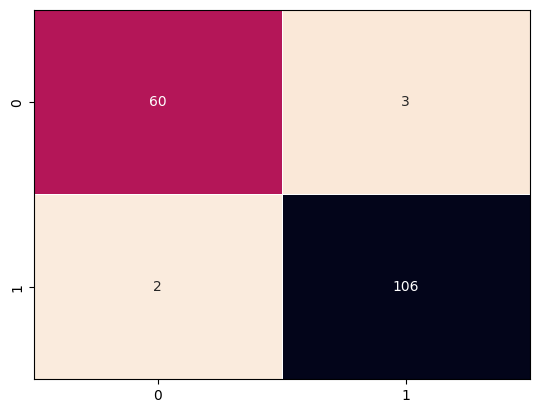

In [13]:
sns.heatmap(cm, fmt='d', annot=True, cbar=False, cmap=sns.cm.rocket_r,
    linewidth=0.5);
sns.despine(left=False, right=False, top=False, bottom=False)

In [27]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## Want to try a different classification algo?

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
# set up the model
clf_LR = LogisticRegression()

In [17]:
# fit the model to train data
clf_LR.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# predict on test
y_test_pred_LR = clf_LR.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_test_pred_LR)

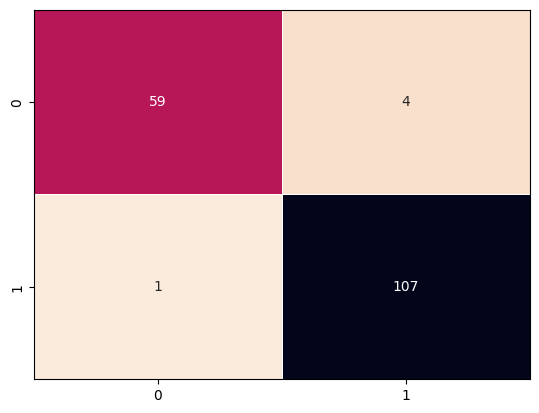

In [20]:
sns.heatmap(cm, fmt='d', annot=True, cbar=False, cmap=sns.cm.rocket_r,
    linewidth=0.5);
sns.despine(left=False, right=False, top=False, bottom=False)

In [28]:
print(classification_report(y_test, y_test_pred_LR))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

